In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error
import sklearn.neural_network as net

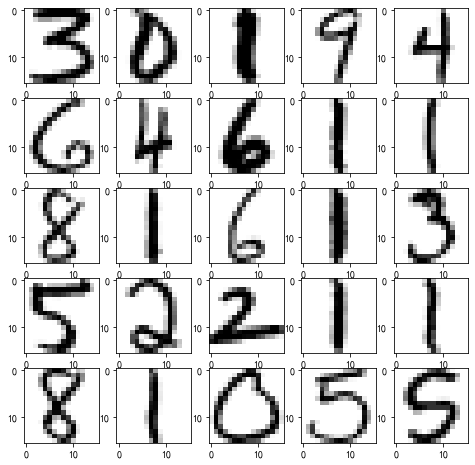

In [2]:
data=pd.read_table('邮政编码数据.txt',sep=' ',header=None)
X=data.iloc[:,1:-1]
Y=data.iloc[:,0]
#print(Y.unique())
np.random.seed(1)
ids=np.random.choice(len(Y),25)
plt.figure(figsize=(8,8))
for i,item in enumerate(ids):
    img=np.array(X.iloc[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray_r)
plt.show()

说明：可视化手写体阿拉伯数字。
1、手写体阿拉伯数字以文本文件格式存储。数据为16乘16的灰度点阵值，存放在2至257列上。第1列为灰度点阵数据对应的实际数字。需首先将行数据转换成16乘16的二维数字。
2、采用pylab库中的imshow函数将存在在数组中的点阵数据显示为图像。图像数据通常用数组的第三维表示颜色。因本例没有颜色，可通过指定参数cmap为cm.gray_rcm.gray_r，表示以白色为背景显示灰度图像。

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.60, random_state=123)
#NeuNet=net.MLPClassifier(activation='logistic',solver='sgd',batch_size=50)
nodes=np.arange(1,20,2)
acts=['relu','logistic']
errTrain=np.zeros((len(nodes),2))
errTest=np.zeros((len(nodes),2))
for i,node in enumerate(nodes):
    for j,act in enumerate(acts):
        NeuNet=net.MLPClassifier(hidden_layer_sizes=(node,),activation=act,random_state=1)
        NeuNet.fit(X_train,Y_train)
        errTrain[i,j]=1-NeuNet.score(X_train,Y_train)
        errTest[i,j]=1-NeuNet.score(X_test,Y_test)

说明：采用三层网络识别手写体阿拉伯数字。
1、隐藏节点分别为1，3，5至19。指定参数activation分别为ReLU和Logistic激活函数。
2、计算训练误差和测试误差。

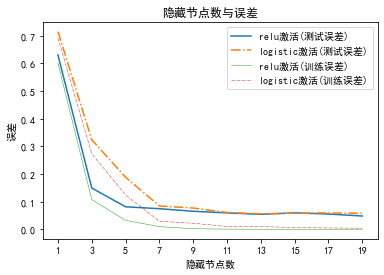

In [5]:
plt.plot(nodes,errTest[:,0],label="relu激活(测试误差)",linestyle='-')
plt.plot(nodes,errTest[:,1],label="logistic激活(测试误差)",linestyle='-.')
plt.plot(nodes,errTrain[:,0],label="relu激活(训练误差)",linestyle='-',linewidth=0.5)
plt.plot(nodes,errTrain[:,1],label="logistic激活(训练误差)",linestyle='-.',linewidth=0.5)
plt.title('隐藏节点数与误差')
plt.xlabel('隐藏节点数')
plt.ylabel('误差')
plt.xticks(nodes)
plt.legend()